In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp


pd.set_option('display.max_columns', None)
data = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257099 entries, 0 to 1257098
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1257099 non-null  int64  
 1   title                 1257086 non-null  object 
 2   vote_average          1257099 non-null  float64
 3   vote_count            1257099 non-null  int64  
 4   status                1257099 non-null  object 
 5   release_date          1016885 non-null  object 
 6   revenue               1257099 non-null  int64  
 7   runtime               1257099 non-null  int64  
 8   adult                 1257099 non-null  bool   
 9   backdrop_path         324553 non-null   object 
 10  budget                1257099 non-null  int64  
 11  homepage              131188 non-null   object 
 12  imdb_id               630914 non-null   object 
 13  original_language     1257099 non-null  object 
 14  original_title        1257086 non-

In [3]:
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


We can clean this data as first step and keep the most relevant part. Some features are not necessary for this analysis and we can make also some consideration or focus on the dataset, like focusing only on english movies. 

Clean dataset from unwanted variables

In [4]:
# variable status
data.status.value_counts(dropna=False)

status
Released           1221429
In Production        15172
Post Production      10949
Planned               8730
Rumored                494
Canceled               325
Name: count, dtype: int64

I dont care about non released movies. Neither about adult movies

In [5]:
# variable adult
data.adult.value_counts(dropna=False)

adult
False    1134010
True      123089
Name: count, dtype: int64

In [6]:
# variable original language
data.original_language.value_counts(dropna=False, normalize=True)

original_language
en    5.440447e-01
fr    5.848306e-02
es    5.113837e-02
de    4.641719e-02
ja    4.389074e-02
          ...     
an    7.954823e-07
rn    7.954823e-07
ts    7.954823e-07
kg    7.954823e-07
ii    7.954823e-07
Name: proportion, Length: 176, dtype: float64

Half of the movies are in english then it gors to 5%...

In [7]:
# variable spoken languages when original language is english
data[data.original_language == 'en'].spoken_languages.value_counts(dropna=False, normalize=True)

spoken_languages
NaN                                                     0.556320
English                                                 0.359435
No Language                                             0.022320
Spanish                                                 0.003619
English, Spanish                                        0.003345
                                                          ...   
Afrikaans, Zulu, English                                0.000001
Spanish, English, Urdu                                  0.000001
English, German, Icelandic, Italian, Polish, Turkish    0.000001
Cantonese, Mandarin, French, Hindi                      0.000001
Hebrew, English, German                                 0.000001
Name: proportion, Length: 3143, dtype: float64

In [8]:
# filter data
data = data[(data.original_language == 'en')&
            (data.status == 'Released')&
            (data.adult == False)&
            (data.release_date.notna())].drop(columns=['original_language', 'spoken_languages', 'status', 'adult', "backdrop_path", "homepage", "imdb_id", "poster_path"])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446206 entries, 0 to 1257098
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    446206 non-null  int64  
 1   title                 446202 non-null  object 
 2   vote_average          446206 non-null  float64
 3   vote_count            446206 non-null  int64  
 4   release_date          446206 non-null  object 
 5   revenue               446206 non-null  int64  
 6   runtime               446206 non-null  int64  
 7   budget                446206 non-null  int64  
 8   original_title        446202 non-null  object 
 9   overview              435536 non-null  object 
 10  popularity            446206 non-null  float64
 11  tagline               102456 non-null  object 
 12  genres                308455 non-null  object 
 13  production_companies  194057 non-null  object 
 14  production_countries  235983 non-null  object 
 15  keyw

Does release date affects votes (count and average) ?

Indepandently to all others features, we want to know if the release date or moment in the year affect positively or negatively the vote

In [10]:
data[['vote_count', 'vote_average']].describe()

,vote_count,vote_average
count,446206.000000,446206.000000
mean,40.700683,2.170303
std,499.515837,3.115064
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,5.088000
max,34495.000000,10.000000


/Users/matthias/Desktop/tmdb_data_eda/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/matthias/Desktop/tmdb_data_eda/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


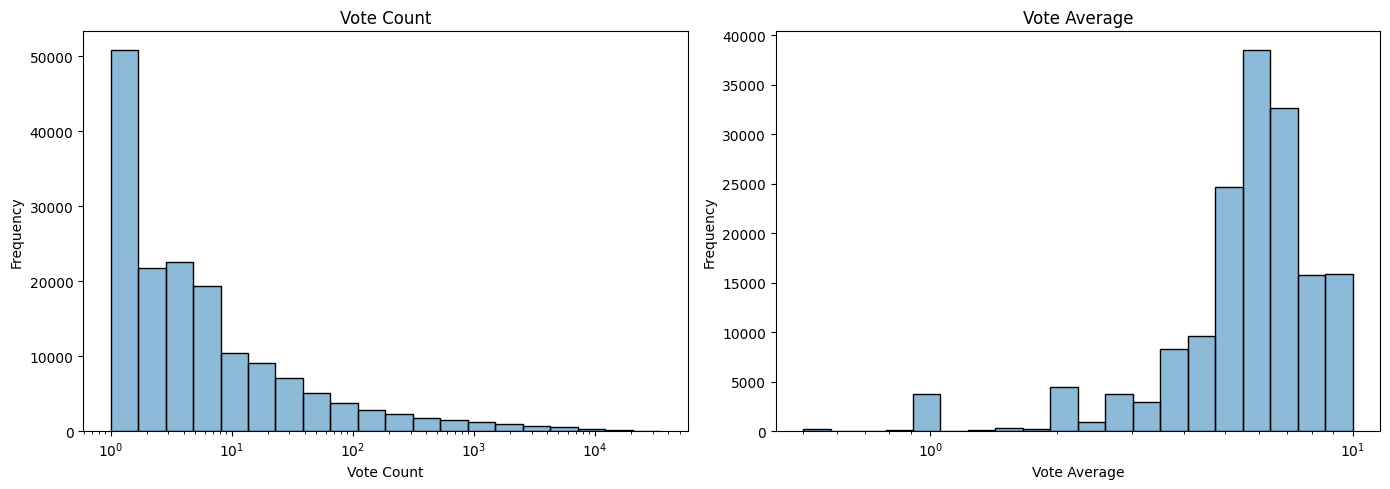

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

votes = data[['vote_count', 'vote_average']].replace([np.inf, -np.inf], np.nan).dropna()

sns.histplot(votes, x="vote_count", bins=20, kde=True, log_scale=True, ax=axes[0])
axes[0].set_title("Vote Count")
axes[0].set_xlabel("Vote Count")
axes[0].set_ylabel("Frequency")

sns.histplot(votes, x="vote_average", bins=20, kde=True, log_scale=True, ax=axes[1])
axes[1].set_title("Vote Average")
axes[1].set_xlabel("Vote Average")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We see clearly that the two distribution look like power distribution skwed left then right.

In [12]:
# transform realease date to datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# add a column for the month of the release
data['release_month'] = data['release_date'].dt.month_name()

# add a column for the year of the release
data['release_year'] = data['release_date'].dt.year

# add a column for the day of the release
data['release_day'] = data['release_date'].dt.day_name()

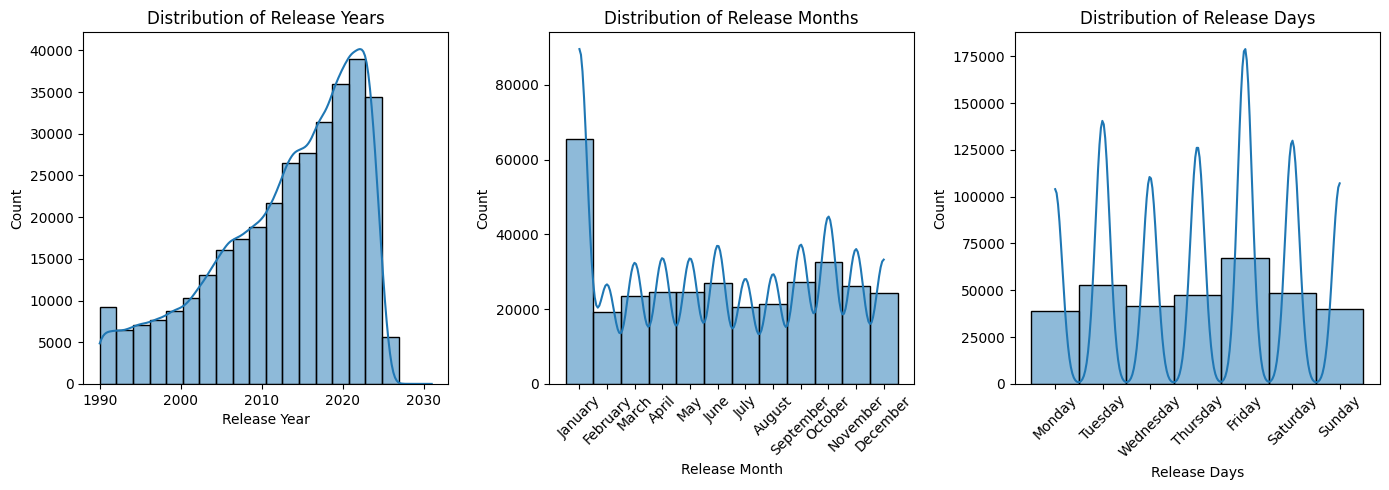

In [65]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['release_month'] = pd.Categorical(data['release_month'], categories=month_order, ordered=True)

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["release_day"] = pd.Categorical(data["release_day"], categories=days_order, ordered=True)

years = data.release_year
months = data.release_month
days = data.release_day

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.histplot(years, bins=20, kde=True, log_scale=False, ax=axes[0])
axes[0].set_title("Distribution of Release Years")
axes[0].set_xlabel("Release Year")
axes[0].set_ylabel("Count")

sns.histplot(months, bins=20, kde=True, log_scale=False, ax=axes[1])
axes[1].set_title("Distribution of Release Months")
axes[1].set_xlabel("Release Month")
axes[1].set_ylabel("Count")

sns.histplot(days, bins=20, kde=True, log_scale=False, ax=axes[2])
axes[2].set_title("Distribution of Release Days")
axes[2].set_xlabel("Release Days")
axes[2].set_ylabel("Count")

plt.setp(axes[1].get_xticklabels(), rotation=45)
plt.setp(axes[2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

We first of al see that there is more and more movies release along the years. This is denoted a new pattern of cinema studios and more and more investiment in the cinema industry. 

We have a peak of releases during the month of January - why ? 

try to explain this gap in January from release year distribution

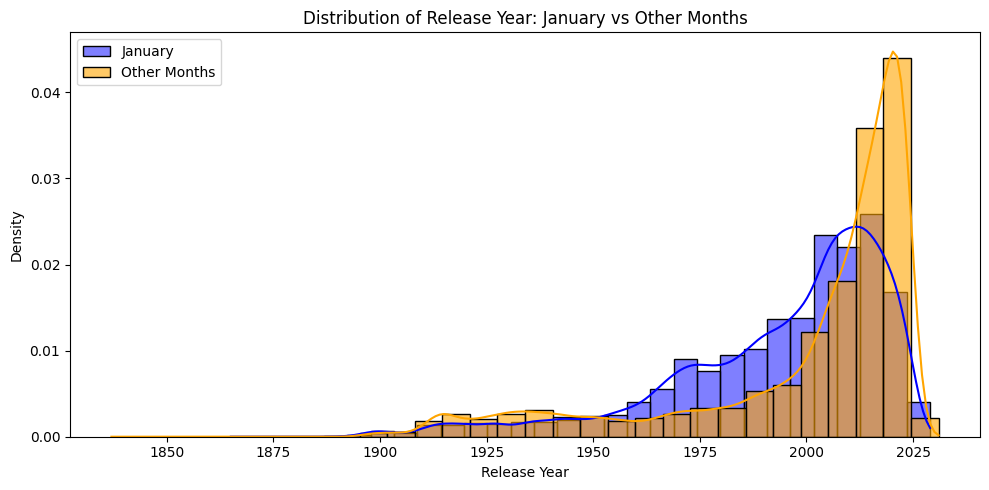

KS Statistic: 0.2500
P-Value: 0.0000
✅ The distributions are significantly different (reject H0).


In [ ]:
# Split dataset
january_movies = data[data['release_month'] == 'January']
other_movies = data[data['release_month'] != 'January']

# Plot distributions of release_year
plt.figure(figsize=(10, 5))

sns.histplot(january_movies['release_year'], bins=30, color='blue', label='January', kde=True, stat='density')
sns.histplot(other_movies['release_year'], bins=30, color='orange', label='Other Months', kde=True, stat='density', alpha=0.6)

plt.title("Distribution of Release Year: January vs Other Months")
plt.xlabel("Release Year")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




# Extract the release years as arrays (drop NaNs)
x = january_movies['release_year'].dropna()
y = other_movies['release_year'].dropna()

# Perform the two-sample KS test
ks_stat, p_value = ks_2samp(x, y)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ The distributions are significantly different (reject H0).")
else:
    print("🟡 The distributions are not significantly different (fail to reject H0).")

We reject the null hypothesis.

There is strong evidence that the distribution of release years in January is different from that in the other months.

This supports your hypothesis:
January is disproportionately populated with older movies, especially pre-2000 ones.



what would be the minimale year include ? to smooth the distribution on release month, to get it uniform

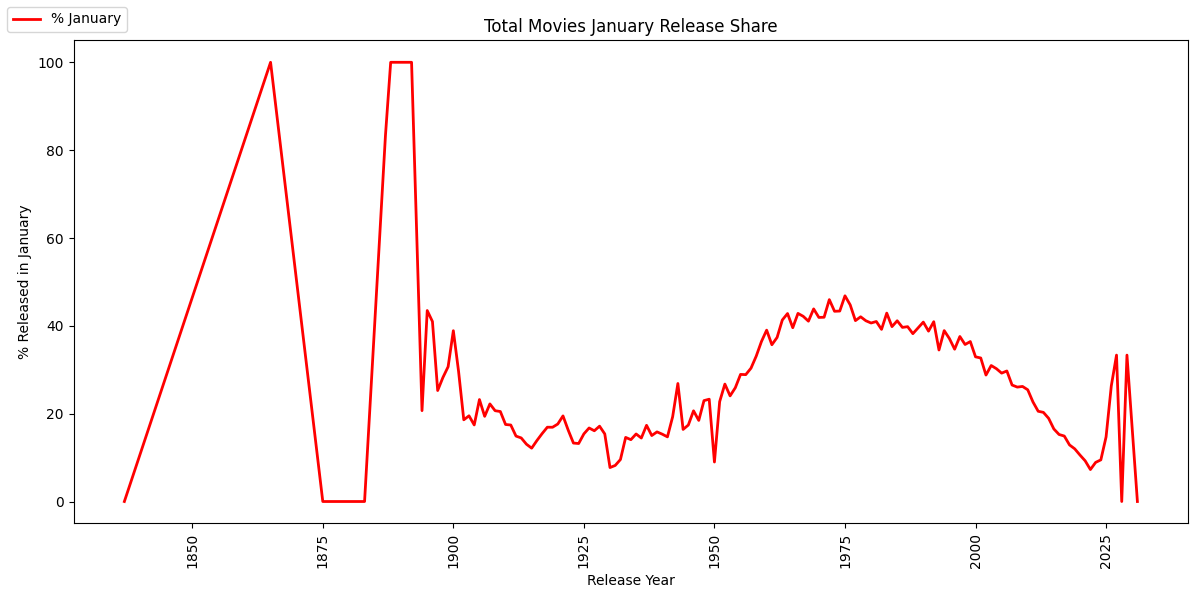

In [60]:
# Group by release year
year_counts = data.groupby('release_year').size()
january_counts = data[data['release_month'] == 'January'].groupby('release_year').size()

# Combine into one DataFrame
year_df = pd.DataFrame({
    'total': year_counts,
    'january': january_counts
}).fillna(0)

# Calculate % of January movies per year
year_df['jan_percent'] = 100*year_df['january'] / year_df['total']

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# # Bar for total movies
# ((year_df['total'])/year_counts.max()).plot(kind='bar', ax=ax1, color='skyblue', label='Total Movies')

# # Line for percent of January releases
# ax2 = ax1.twinx()
year_df['jan_percent'].plot(ax=ax1, color='red', label='% January', linewidth=2)

# Labels
ax1.set_xlabel('Release Year')
ax1.set_ylabel('% Released in January')
# ax2.set_ylabel('% Released in January')
ax1.set_title('Total Movies January Release Share')
fig.legend(loc='upper left')

plt.setp(ax1.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


Before 1980:

Extremely volatile and artificially high % of movies released in January — in some years it's over 50% or even 100%.

This strongly suggests default or placeholder dates, possibly due to missing metadata.


1980–1999:

Still elevated and noisy, but stabilizing.

January still over-represented in many years (30–40%).


2000 onward:

Much more stable.

January release share gradually declines below 20%, which feels realistic.


Let s take release_year>=1990 to include most of the modern hollywood cinema (John Doe, Tarantino, Die Hard 2, The matrix)

After research on the web apparently January month is called the dump month, it is the moment when studios release movies they are less confident in it. So let s investigate, using the popularity varibale.


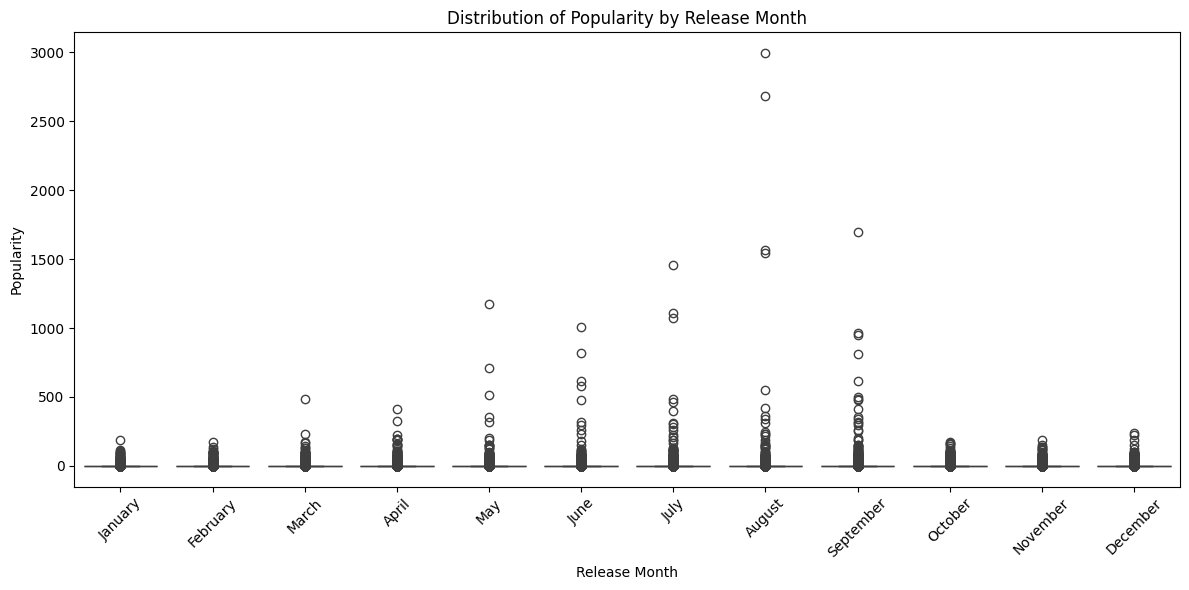

January median popularity: 0.56
Other months median popularity: 0.70
Mann–Whitney U statistic: 7529161086.00
P-value: 0.0000
✅ January movies have significantly lower popularity.


In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_month', y='popularity', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Popularity by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

jan_pop = np.log1p(data[data['release_month'] == 'January']['popularity'])
other_pop = np.log1p(data[data['release_month'] != 'January']['popularity'])

print(f"January median popularity: {jan_pop.mean():.2f}")
print(f"Other months median popularity: {other_pop.mean():.2f}")

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(jan_pop, other_pop, alternative='less')  # one-sided test

print(f"Mann–Whitney U statistic: {stat:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ January movies have significantly lower popularity.")
else:
    print("🟡 No significant difference in popularity.")

Let s focus on how the time affect the vote count and vote average.

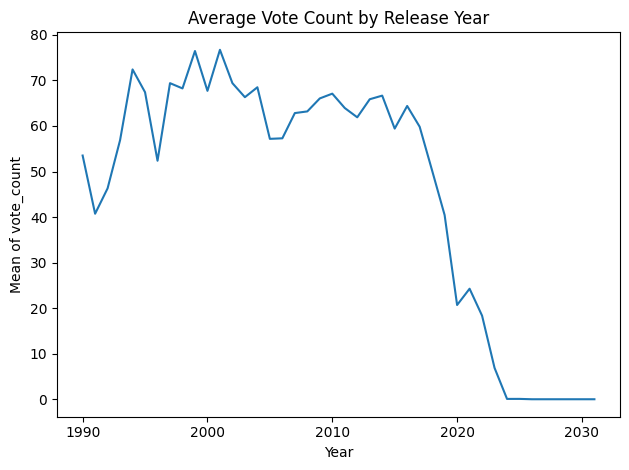

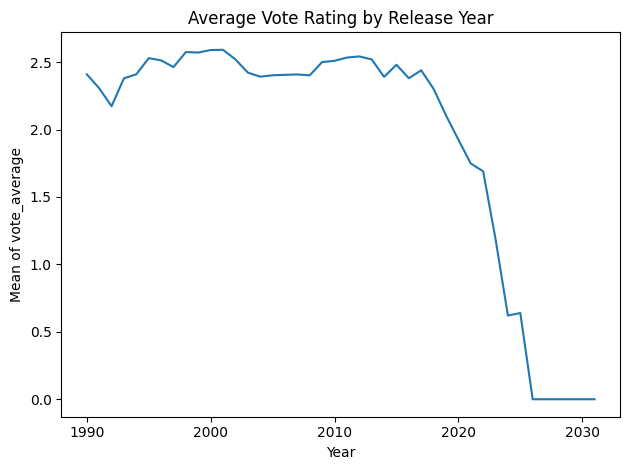

In [ ]:
stats = data.groupby('release_year').agg(
    avg_votes=('vote_count', 'mean'),
    avg_rating=('vote_average', 'mean'),
    n_movies=('id', 'count')
).reset_index()

# Average votes over years
plt.figure()
plt.plot(stats['release_year'], stats['avg_votes'])
plt.title('Average Vote Count by Release Year')
plt.xlabel('Year')
plt.ylabel('Mean of vote_count')
plt.tight_layout()

# Average rating over years
plt.figure()
plt.plot(stats['release_year'], stats['avg_rating'])
plt.title('Average Vote Rating by Release Year')
plt.xlabel('Year')
plt.ylabel('Mean of vote_average')
plt.tight_layout()

Interpretation: Average vote_count curve
From your plot:

1990s–2010s: Fairly high and stable average vote counts.

Post-2016: Sharp decline in vote count.

Post-2020: Near-zero vote count average.

🧠 Why?
Movies released more recently haven't had time to accumulate votes.

A 2018 film had 6 years to get attention — a 2023 film has maybe months.

It's a classic data recency bias → lower values are not due to quality, but due to time.

🧠 Interpretation: Average vote_average curve
(You mentioned it but didn’t attach it — but same analysis applies.)

Typically:

vote_average is often more stable over time.

But if you observe a dip or rise, it may reflect:

Trends in rating culture

Streaming vs theater bias

More niche movies in recent years

In [99]:
stats = stats[stats.release_year<2025]

In [103]:
from scipy.stats import zscore
stats['z_avg_rating'] = zscore(stats['avg_rating'])
stats['z_avg_votes'] = zscore(stats['avg_votes'])

/var/folders/bp/szmb53ln69g1dw86ypx_p5pr0000gp/T/ipykernel_85833/1588809014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['z_avg_rating'] = zscore(stats['avg_rating'])
/var/folders/bp/szmb53ln69g1dw86ypx_p5pr0000gp/T/ipykernel_85833/1588809014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['z_avg_votes'] = zscore(stats['avg_votes'])


In [104]:
stats

,release_year,avg_votes,avg_rating,n_movies,z_avg_rating,z_avg_votes
0,1990,53.513360,2.409239,2994,0.279479,-0.084169
1,1991,40.735516,2.305823,3055,0.025993,-0.755039
2,1992,46.313594,2.172864,3141,-0.299908,-0.462176
3,1993,56.894057,2.379901,3096,0.207568,0.093326
4,1994,72.417668,2.409739,3328,0.280706,0.908356
5,1995,67.417187,2.529149,3526,0.573396,0.645818
6,1996,52.365888,2.512671,3553,0.533005,-0.144414
7,1997,69.406668,2.463244,3809,0.411854,0.750271
8,1998,68.249744,2.574290,3908,0.684043,0.689530
9,1999,76.462517,2.570636,4322,0.675087,1.120722


In [105]:
stats[stats.release_year<2025][['release_year', 'z_avg_votes', 'z_avg_rating']].corr()

,release_year,z_avg_votes,z_avg_rating
release_year,1.000000,-0.551490,-0.565276
z_avg_votes,-0.551490,1.000000,0.918801
z_avg_rating,-0.565276,0.918801,1.000000


Text(0.5, 1.0, 'Avg Vote Count by Year and Month')

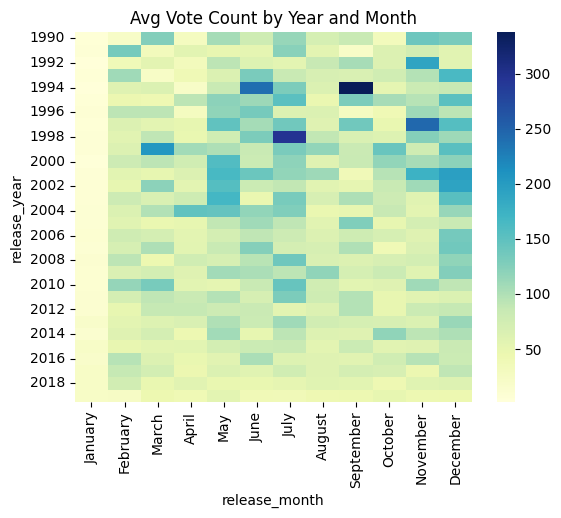

In [115]:
heatmap_data = data[data.release_year<2020].groupby(['release_year', 'release_month'], observed=True)['vote_count'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Avg Vote Count by Year and Month')

Text(0.5, 1.0, 'Avg Vote Count by Year and Month')

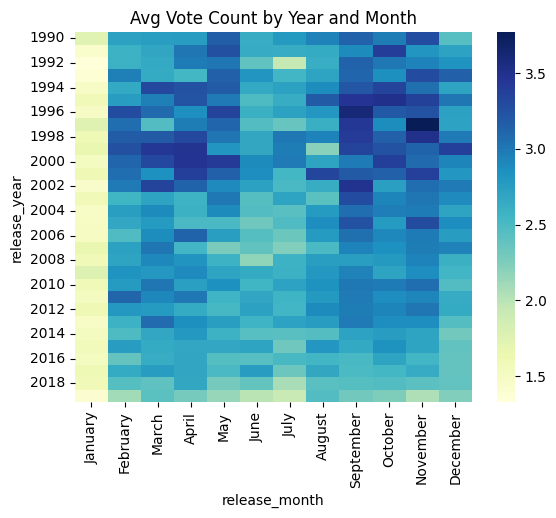

In [116]:
heatmap_data = data[data.release_year<2020].groupby(['release_year', 'release_month'], observed=True)['vote_average'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Avg Vote Count by Year and Month')

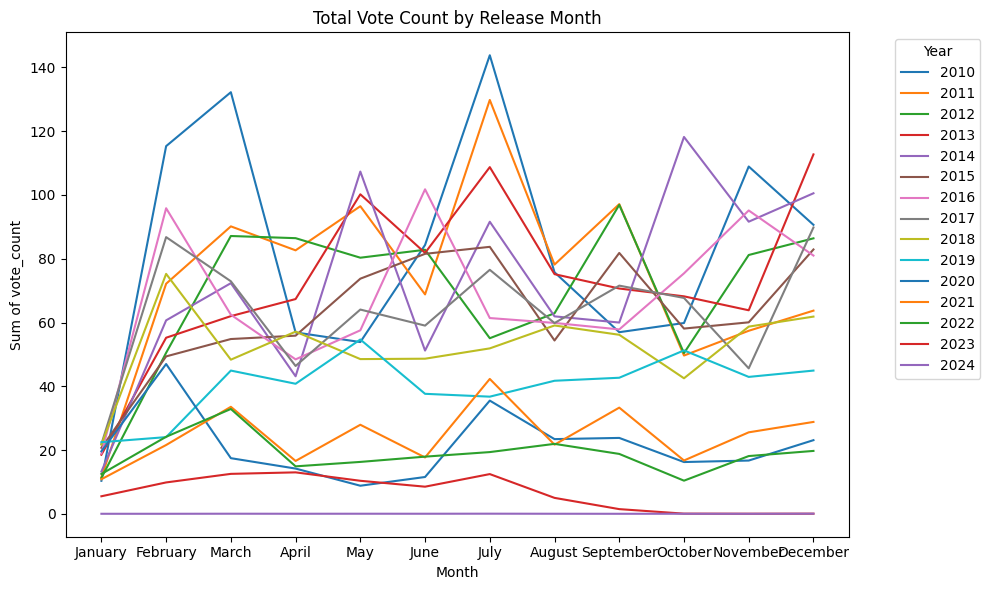

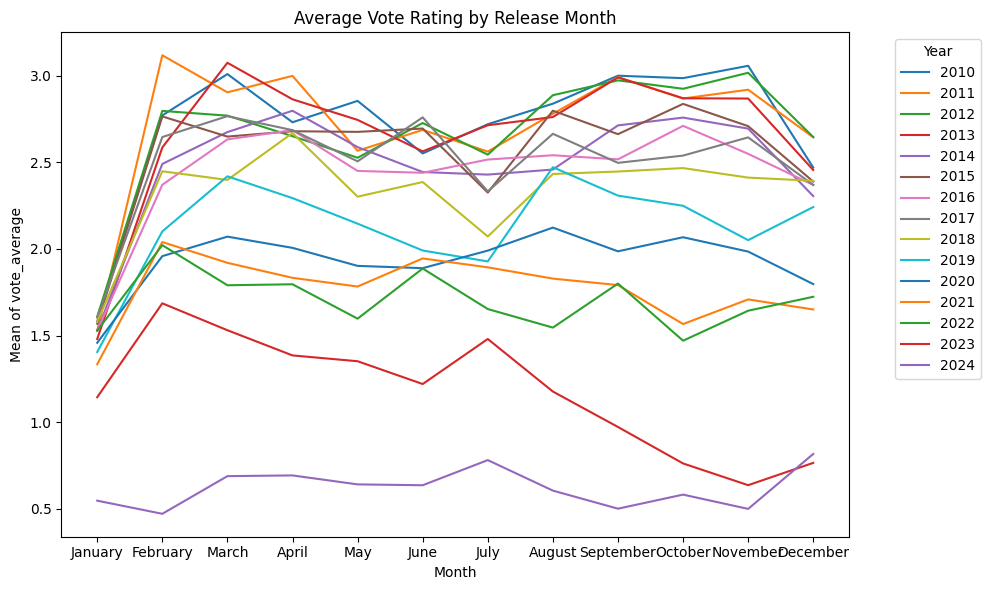

In [86]:

years = range(2010, 2025)

# Total votes over years (all lines on one figure)
plt.figure(figsize=(10, 6))
for y in years:
    stats = data[data['release_year'] == y].groupby('release_month', observed=True).agg(
        total_votes=('vote_count', 'mean')
    ).reset_index()
    plt.plot(stats['release_month'], stats['total_votes'], label=str(y))
plt.title('Total Vote Count by Release Month')
plt.xlabel('Month')
plt.ylabel('Sum of vote_count')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Average rating over years (all lines on one figure)
plt.figure(figsize=(10, 6))
for y in years:
    stats = data[data['release_year'] == y].groupby('release_month', observed=True).agg(
        avg_rating=('vote_average', 'mean')
    ).reset_index()
    plt.plot(stats['release_month'], stats['avg_rating'], label=str(y))
plt.title('Average Vote Rating by Release Month')
plt.xlabel('Month')
plt.ylabel('Mean of vote_average')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
pearson_votes  = data['month'].corr(data['vote_count'], method='pearson')
pearson_rating = data['month'].corr(data['vote_average'], method='pearson')
print(f"Pearson corr (month vs vote_count)   = {pearson_votes:.3f}")
print(f"Pearson corr (month vs vote_average) = {pearson_rating:.3f}")

# 3. Spearman rank correlations (captures monotonic but non‑linear trends)
spearman_votes  = data['month'].corr(data['vote_count'], method='spearman')
spearman_rating = data['month'].corr(data['vote_average'], method='spearman')
print(f"Spearman r (month vs vote_count)   = {spearman_votes:.3f}")
print(f"Spearman r (month vs vote_average) = {spearman_rating:.3f}")

Pearson corr (month vs vote_count)   = 0.019
Pearson corr (month vs vote_average) = 0.075
Spearman r (month vs vote_count)   = 0.084
Spearman r (month vs vote_average) = 0.081


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# vote_count by month
model_votes = ols('vote_count ~ C(month)', data=data).fit()
anova_votes = sm.stats.anova_lm(model_votes, typ=2)
print(anova_votes)

# vote_average by month
model_rating = ols('vote_average ~ C(month)', data=data).fit()
anova_rating = sm.stats.anova_lm(model_rating, typ=2)
print(anova_rating)


                sum_sq         df          F         PR(>F)
C(month)  7.947627e+07       11.0  63.785249  2.704643e-143
Residual  1.151838e+11  1016873.0        NaN            NaN
                sum_sq         df            F  PR(>F)
C(month)  1.104120e+05       11.0  1055.346674     0.0
Residual  9.671530e+06  1016873.0          NaN     NaN
